In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from arch import arch_model

In [2]:
import pandas as pd

df = pd.read_excel("Nifty 50 Historical Data (1).xlsx")

df = df[['Date', 'Price']].copy()
df = df.sort_values(by='Date').reset_index(drop=True)

import numpy as np
df['log_return'] = np.log(df['Price'] / df['Price'].shift(1))
df = df.dropna().reset_index(drop=True)

In [3]:
model = arch_model(
    df['log_return'] * 100,
    mean='Constant',
    vol='GARCH',
    p=1,
    q=1,
    dist='normal'
)

results = model.fit(disp='off')


## Forecast Horizon

A 30-day ahead forecast of conditional variance is generated using the
estimated GARCH(1,1) model.

In [4]:
forecast_horizon = 30

forecast = results.forecast(horizon=forecast_horizon)


## Volatility Projection

Forecasted conditional variance is transformed into volatility to
obtain an interpretable forward-looking risk measure.

In [5]:
variance_forecast = forecast.variance.iloc[-1]
volatility_forecast = np.sqrt(variance_forecast)


## Forecast Timeline

Business-day dates are constructed to align forecasted volatility with
trading days.

In [6]:
forecast_dates = pd.date_range(
    start=df['Date'].iloc[-1],
    periods=forecast_horizon + 1,
    freq='B'
)[1:]

vol_forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted Volatility (%)': volatility_forecast.values
})


## Volatility Forecast Visualization

The projected volatility path illustrates the model’s expectations of
market risk over the short-term horizon.

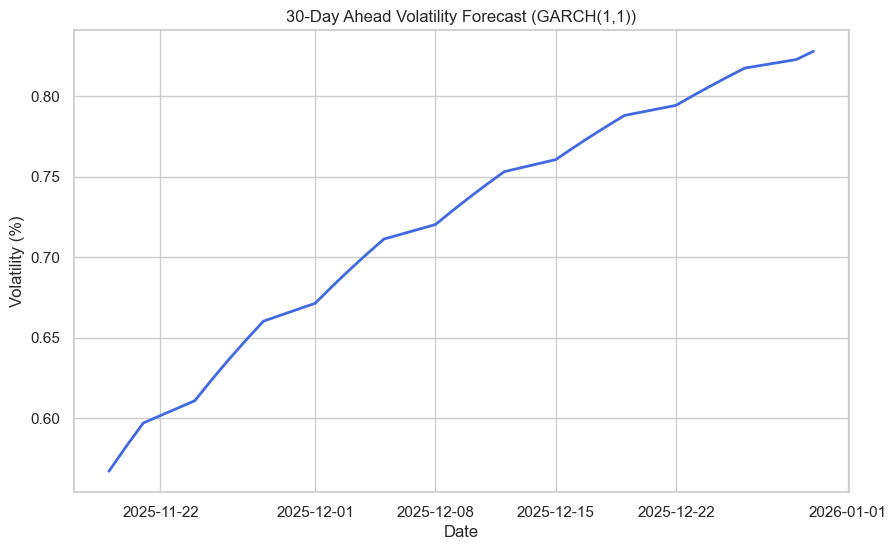

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.lineplot(data=vol_forecast_df, x='Date', y='Forecasted Volatility (%)', color='royalblue', linewidth=2)

plt.title("30-Day Ahead Volatility Forecast (GARCH(1,1))")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")

plt.show()
